<a href="https://colab.research.google.com/github/JVMA0111/Data_Science_Projects/blob/main/Pandas_Conhecendo_a_biblioteca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando e verificando características gerais dos dados

In [ ]:
import pandas as pd
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv", sep = ';')
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
dados.shape

(32960, 9)

#Análises exploratórias

#Valor médio de aluguel por tipo de imóvel

In [ ]:
aluguel_por_tipo_imovel = dados.iloc[:,[0,6]]
media_por_tipo = aluguel_por_tipo_imovel.groupby("Tipo").mean().sort_values('Valor', ascending = False)
media_por_tipo.round(2)

,Valor
Tipo,
Prédio Inteiro,498637.24
Indústria,120000.00
Galpão/Depósito/Armazém,53407.06
Terreno Padrão,32567.71
Hotel,25000.00
Loteamento/Condomínio,22000.00
Conjunto Comercial/Sala,14715.05
Casa Comercial,14478.26
Loja/Salão,13769.65


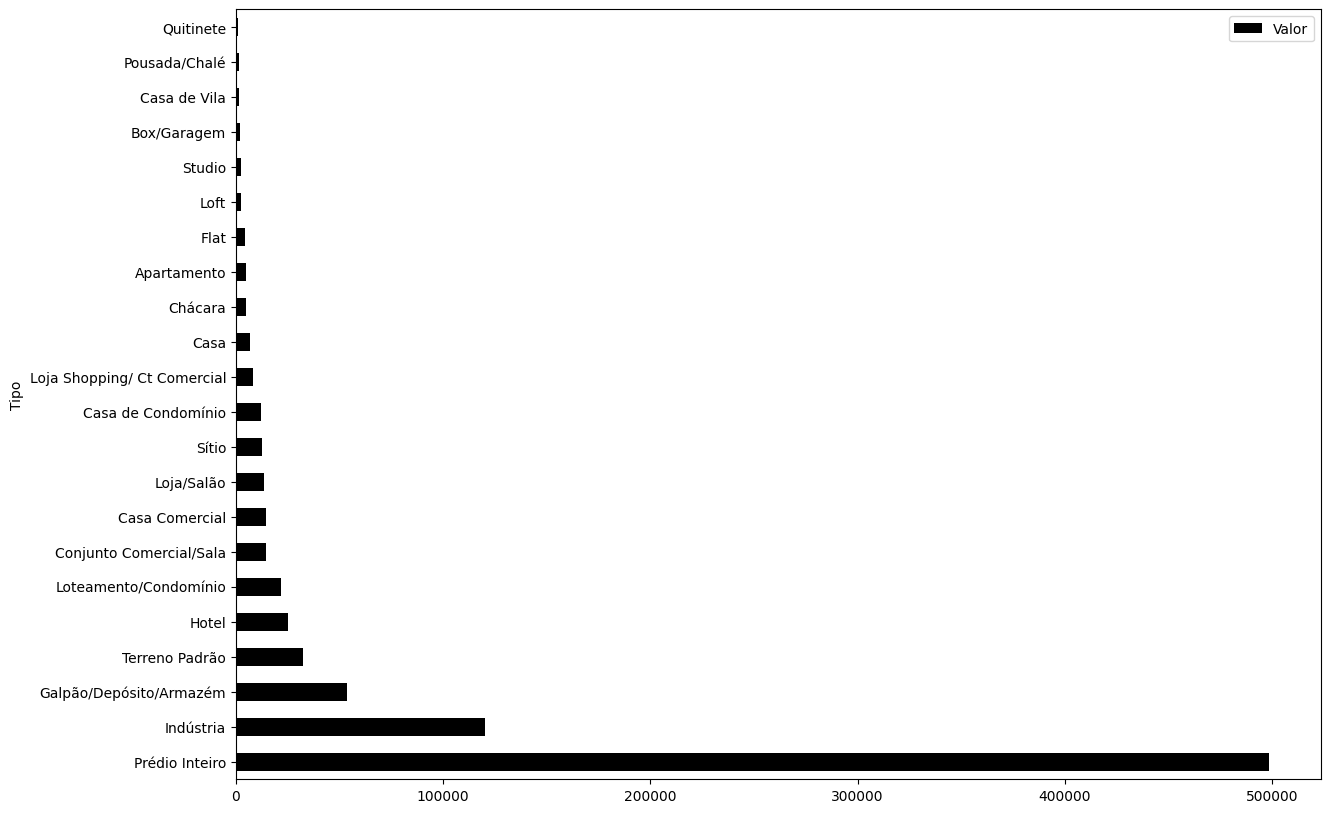

In [ ]:
media_por_tipo.plot(kind = 'barh', figsize = (14,10), color = 'blacK');

#Percentual de cada tipo de imóvel presente na base de dados

In [ ]:
def porcentagem(df):
    total = df["Tipo"].sum()

    df["Porcentagem"] = (df["Tipo"] / total) * 100

    df["Porcentagem"] = df["Porcentagem"].round(2)

    return df

In [ ]:
imoveis_comerciais = [ 'Conjunto Comercial/Sala',
                      'Loja/Salão', 'Prédio Inteiro', 'Galpão/Depósito/Armazém',
                       'Casa Comercial', 'Terreno Padrão', 'Loja Shopping/ Ct Comercial',
                       'Box/Garagem', 'Hotel', 'Indústria', 'Chácara', 'Loteamento/Condomínio', 'Sítio',
                       'Pousada/Chalé']
df_imoveis = dados.query('@imoveis_comerciais not in Tipo')
df_imoveis

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
percentual_tipo_imovel = df_imoveis.Tipo.value_counts().to_frame()
percentual_tipo_imovel = porcentagem(percentual_tipo_imovel)
percentual_tipo_imovel

,Tipo,Porcentagem
Apartamento,19532,84.51
Casa de Condomínio,996,4.31
Casa,967,4.18
Quitinete,836,3.62
Flat,476,2.06
Casa de Vila,249,1.08
Loft,51,0.22
Studio,4,0.02


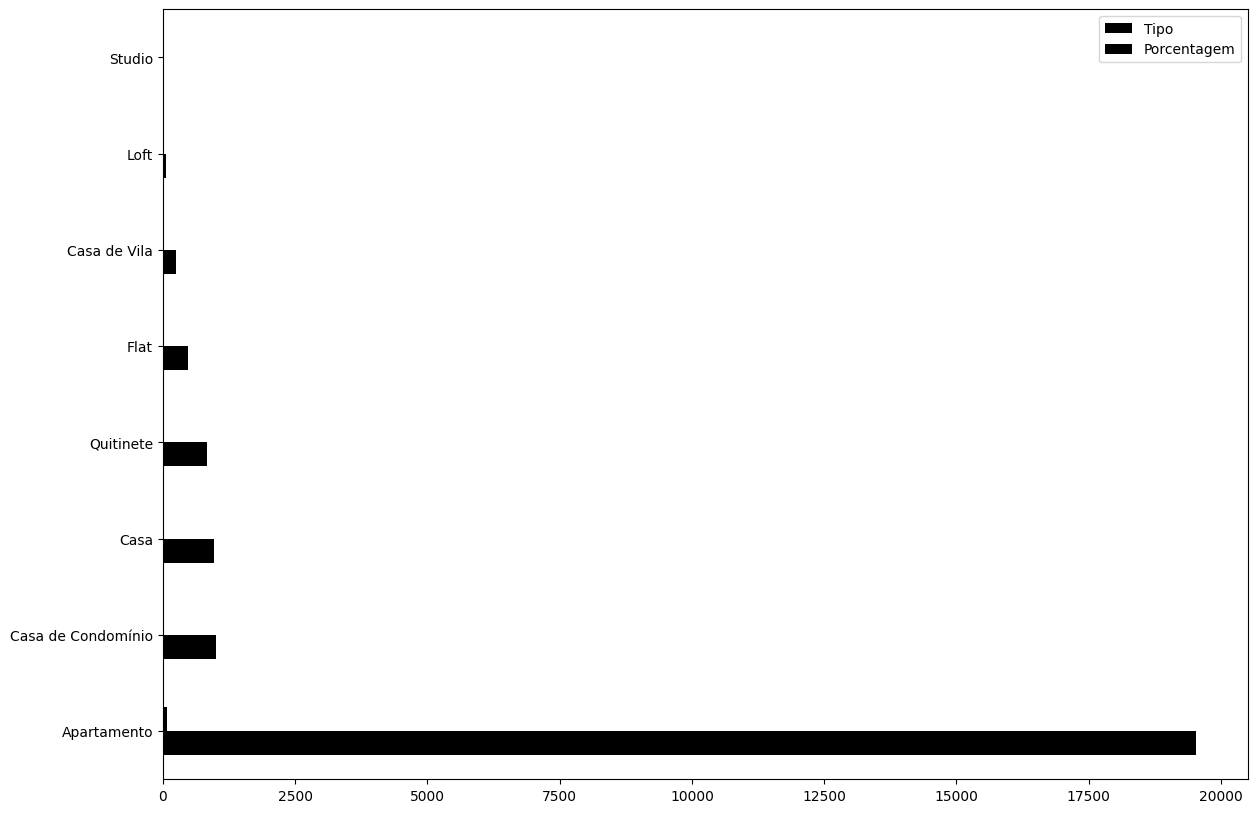

In [ ]:
percentual_tipo_imovel.plot(kind = 'barh', figsize = (14,10), color = 'blacK');

#Tratando valores nulos

In [ ]:
valores_nulos = dados.isna().sum()
df_imoveis = df_imoveis.fillna(0)
df_imoveis = df_imoveis.loc[(df_imoveis['Valor'] != 0) & (df_imoveis['Condominio'] != 0)]
df_imoveis

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
df_imoveis.isna().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

#Média dos selecionados

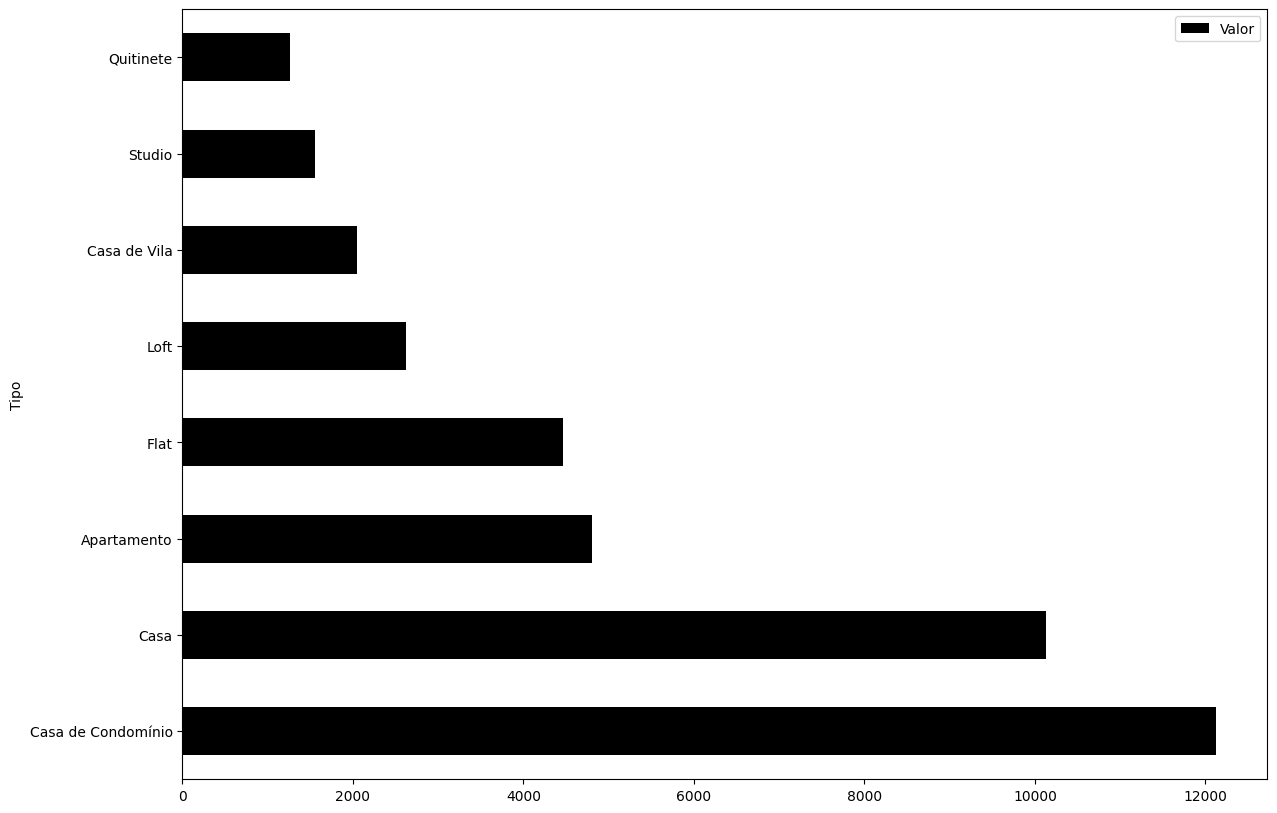

In [ ]:
aluguel_por_tipo_imovel_selecionados = df_imoveis.iloc[:,[0,6]]
media_por_tipo_selecionados = aluguel_por_tipo_imovel_selecionados.groupby("Tipo").mean().sort_values('Valor', ascending = False)
media_por_tipo_selecionados.round(2)
media_por_tipo_selecionados.plot(kind = 'barh', figsize = (14,10), color = 'blacK');

#Selecionando apenas os imóveis do tipo apartamento

Essa seleção se deve ao fato do Tipo == Apartamento ser o mais frequente.

In [ ]:
df_apartamento = df_imoveis.query('Tipo == "Apartamento"')
df_apartamento

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


#Cálculo da média de quartos por apartamento

In [ ]:
media_quartos_apartamento = df_apartamento.groupby('Tipo').mean(numeric_only = True)
media_quartos_apartamento.drop(columns = ['Vagas', 'Suites', 'Area', 'Valor', 'Condominio', 'IPTU'])

,Quartos
Tipo,
Apartamento,2.499095


#Bairros únicos existentes na base de dados

In [ ]:
len(df_imoveis.Bairro.unique())

147

#Bairros com valor de aluguel mais elevados

In [ ]:
media_aluguel_por_bairro = df_imoveis.groupby('Bairro').mean(numeric_only = True).sort_values('Valor', ascending = False)
media_aluguel_por_bairro = media_aluguel_por_bairro.drop(columns = ['Vagas', 'Suites', 'Area', 'Quartos', 'Condominio', 'IPTU'])
media_aluguel_por_bairro = media_aluguel_por_bairro.round(2)
media_aluguel_por_bairro

,Valor
Bairro,
Joá,14053.33
Cidade Jardim,12000.00
Arpoador,11189.13
Itanhangá,9187.50
Ipanema,9179.15
...,...
Pavuna,602.50
Cavalcanti,590.00
Santa Cruz,590.00


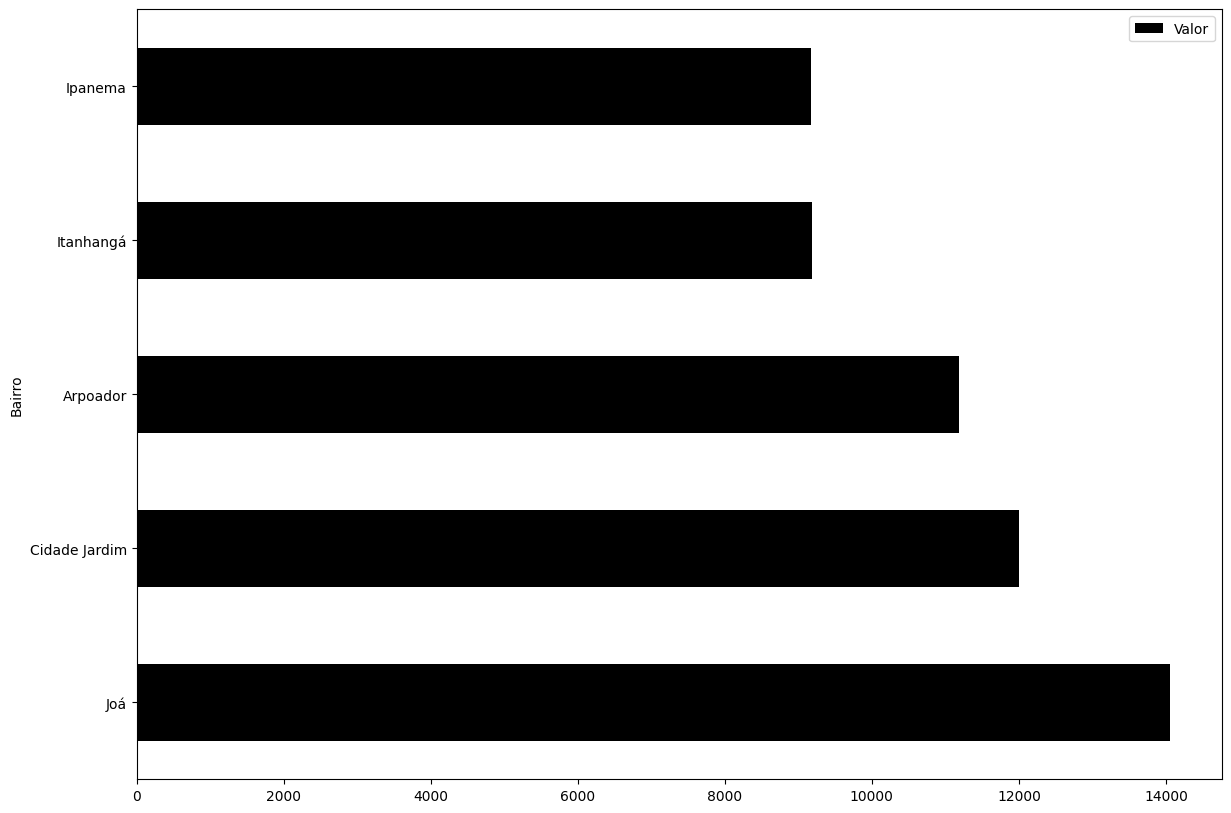

In [ ]:
media_aluguel_por_bairro.head().plot(kind = 'barh', figsize = (14,10), color = 'black');

#Filtrando as análises

#Apartamentos de 1 quarto e aluguel menor de R$1200

In [ ]:
apartamentos_1_quarto_e_aluguel_menor_1200= df_apartamento.query("Quartos == 1 and Valor < 1200")
apartamentos_1_quarto_e_aluguel_menor_1200

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32596,Apartamento,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Apartamento,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Apartamento,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Apartamento,Botafogo,1,0,0,21,1000.0,282.0,25.0


#Apartamentos de pelo menos 2 quartos, aluguel menor de R$ 3000 e área maior que 70m²

In [ ]:
apartamentos_2_quartos_aluguel_menor_3000_area_maior_70 = df_apartamento.query("Quartos >= 2 and Valor < 3000 and Area > 70")
apartamentos_2_quartos_aluguel_menor_3000_area_maior_70

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...,...
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


#Salvando os dados

In [ ]:
df_apartamento.to_csv('dados_apartamentos.csv', index = False, sep = ';' )
pd.read_csv('dados_apartamentos.csv', sep = ';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
18777,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
apartamentos_1_quarto_e_aluguel_menor_1200.to_csv('1_quarto_aluguel_menor_1200.csv', index = False, sep =';')
pd.read_csv('1_quarto_aluguel_menor_1200.csv', sep = ';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
4,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
494,Apartamento,Grajaú,1,0,1,37,1000.0,200.0,0.0
495,Apartamento,Pechincha,1,0,1,69,900.0,640.0,126.0
496,Apartamento,Glória,1,0,0,46,1100.0,453.0,32.0
497,Apartamento,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [ ]:
apartamentos_2_quartos_aluguel_menor_3000_area_maior_70.to_csv('2_quartos_aluguel_menor_3000_area_70.csv', index = False, sep =';')
pd.read_csv('2_quartos_aluguel_menor_3000_area_70.csv', sep = ';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0
3,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,0.0
4,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...,...
4454,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
4455,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
4456,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
4457,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


#Adicionando colunas numéricas

In [185]:
url = ('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv')
dados_2 = pd.read_csv(url,sep = ';')
dados_2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [186]:
dados_2['Valor_por_mes'] = dados.Valor + dados.Condominio
dados_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [189]:
dados_2['Valor_por_ano'] = dados_2.Valor_por_mes * 12 + dados_2.IPTU
dados_2.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0,0.0


#Adicionando coluna categórica

#Descrição

In [196]:
dados_2['Descricao'] = dados['Tipo']+ ' em ' +  dados['Bairro'] + ' com ' + \
                    dados['Quartos'].astype(str) + ' quarto(s) ' + \
                    ' e ' + dados ['Vagas'].astype(str) + ' vaga(s) de garagem. '
dados_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...


In [197]:
dados_2['Possui_suite'] = dados_2['Suites'].apply(lambda x:'Sim' if x > 0 else "Não")
dados_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não


In [198]:
dados_2.to_csv('dados_completos_dev.csv', index=False, sep=';')

In [204]:
alunos = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv')
alunos['Pontos_extras'] = alunos.Notas * 0.4

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,0.0,False,0.00
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,0.0,False,0.00
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,0.0,False,0.00


In [217]:
alunos["Notas_finais"] = alunos.Notas + alunos.Pontos_extras
alunos['Aprovado_final'] = alunos.Notas_finais.apply(lambda x: True if x >= 6 else False)
alunos.fillna(0)

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,0.0,False,0.00,0.00,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,0.0,False,0.00,0.00,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,0.0,False,0.00,0.00,False


In [218]:
alunos.query('Aprovado == False & Aprovado_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
